# DS106-01-09-ML - Lesson 1 Hands-On

---

### Import packages
- `pandas` for loading in data
- `numpy` for square-rooting your model estimates
- `sklearn` for the bulk of the linear regression and modeling work 
- `matplotlib` to graph the model's residuals
- `KFold` and `cross_val_score` for k-fold cross validation

In [1]:
# import packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

### Import data

In [2]:
# import `seaborn` data
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [3]:
# look at dataset
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
43173,0.54,Premium,I,VS1,61.5,58.0,1389,5.28,5.26,3.24
23375,0.33,Very Good,D,SI2,63.3,53.0,631,4.42,4.39,2.79
6542,1.01,Very Good,F,SI2,63.1,57.0,4072,6.37,6.30,4.00
35399,0.39,Very Good,E,VS1,60.0,59.0,900,4.76,4.80,2.87
27293,1.87,Ideal,H,VS1,59.7,60.0,17761,7.98,8.04,4.78


---
## Predict the price of diamonds with these variables:
- `carat`
- `cut`
- `color`
- `clarity`

In [4]:
# list the datatypes of all variables
Diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

## Recode variables
For linear regression, you cannot have any non-number values in your dataset. Recode the categories to numbers.

*_Note: `carat` is already numeric, so will not need to be recoded_

### Recode `cut`

In [5]:
# list the value counts for 'cut'
Diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
# recode function
def cutRecode (series):
    if series == "Ideal":
        return 0
    if series == "Premium":
        return 1
    if series == "Very Good":
        return 2
    if series == "Good":
        return 3
    if series == "Fair":
        return 4
Diamonds['cutRecode'] = Diamonds['cut'].apply(cutRecode)

In [7]:
# inspect result
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutRecode
43173,0.54,Premium,I,VS1,61.5,58.0,1389,5.28,5.26,3.24,1
23375,0.33,Very Good,D,SI2,63.3,53.0,631,4.42,4.39,2.79,2
6542,1.01,Very Good,F,SI2,63.1,57.0,4072,6.37,6.30,4.00,2
35399,0.39,Very Good,E,VS1,60.0,59.0,900,4.76,4.80,2.87,2
27293,1.87,Ideal,H,VS1,59.7,60.0,17761,7.98,8.04,4.78,0


### Recode `color`

In [8]:
# list the value counts for 'cut'
Diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
# recode function
def colorRecode (series):
    if series == "G":
        return 5
    if series == "E":
        return 6
    if series == "F":
        return 7
    if series == "H":
        return 8
    if series == "D":
        return 9
    if series == "I":
        return 10
    if series == "J":
        return 11
Diamonds['colorRecode'] = Diamonds['color'].apply(colorRecode)

In [10]:
# inspect result
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutRecode,colorRecode
43173,0.54,Premium,I,VS1,61.5,58.0,1389,5.28,5.26,3.24,1,10
23375,0.33,Very Good,D,SI2,63.3,53.0,631,4.42,4.39,2.79,2,9
6542,1.01,Very Good,F,SI2,63.1,57.0,4072,6.37,6.30,4.00,2,7
35399,0.39,Very Good,E,VS1,60.0,59.0,900,4.76,4.80,2.87,2,6
27293,1.87,Ideal,H,VS1,59.7,60.0,17761,7.98,8.04,4.78,0,8


### Recode `clarity`

In [11]:
# list the value counts for 'cut'
Diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
# recode function
def clarityRecode (series):
    if series == "SI1":
        return 12
    if series == "VS2":
        return 13
    if series == "SI2":
        return 14
    if series == "VS1":
        return 15
    if series == "VVS2":
        return 16
    if series == "VVS1":
        return 17
    if series == "IF":
        return 18
    if series == "I1":
        return 19
Diamonds['clarityRecode'] = Diamonds['clarity'].apply(clarityRecode)

In [13]:
# inspect result
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cutRecode,colorRecode,clarityRecode
43173,0.54,Premium,I,VS1,61.5,58.0,1389,5.28,5.26,3.24,1,10,15
23375,0.33,Very Good,D,SI2,63.3,53.0,631,4.42,4.39,2.79,2,9,14
6542,1.01,Very Good,F,SI2,63.1,57.0,4072,6.37,6.30,4.00,2,7,14
35399,0.39,Very Good,E,VS1,60.0,59.0,900,4.76,4.80,2.87,2,6,15
27293,1.87,Ideal,H,VS1,59.7,60.0,17761,7.98,8.04,4.78,0,8,15


---
## Set **predictive (`x`)** and **target (`y`) variables**

In [14]:
# predictive variables
x = Diamonds[['carat', 'cutRecode', 'colorRecode', 'clarityRecode']]

# target variable (what you are trying to predict)
y = Diamonds['price']

---
## Modeling with `train_test_split()`

In [15]:
# `test_size= .4` because you are using a 60/40 train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

In [16]:
# to see the shape of the data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


---
## Linear Regression Model

In [17]:
# run linear regression model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

---
## Examine predictions

In [18]:
# see predictions from model
predictions = lm.predict(x_test)
predictions

array([2398.7786883 , 9580.85125486, 1409.24522519, ..., 4503.28759385,
       3007.24852689, 3188.21138882])

---
## Plot predicitons for visual inspection

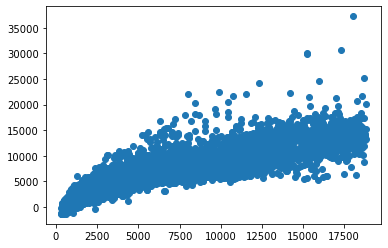

In [19]:
# plot the predictions
plt.scatter(y_test, predictions)

---
## Accuracy score

In [20]:
# Accuracy score
print("Score:", lm.score(x_test, y_test))

Score: 0.8592208411049045


#### Conclusion: This model accurately predicts the price of diamonds about 86% of the time.

---
## Mean Absolute Error (MAE)
- the average amount of error between the prediction and the real data. 

In [21]:
metrics.mean_absolute_error(y_test, predictions)

961.8211061977559

##### _Since the lowest you can have is 0, this value indicates the model is not very accurate._

---
## Mean Squared Error (MSE)
- the square of the absolute error from above. It's a good one to use because it takes into account large amounts of error, which often happens in the real world.

In [22]:
metrics.mean_squared_error(y_test, predictions)

2189439.1198597387

---
## Root Mean Squared Error (RMSE)
- the square root of the mean squared error you saw above. It is probably the most popular.

In [23]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1479.6753427220915

##### _Since the lowest you can have is 0, this value indicates the model is not very accurate._

---
## `k`-fold cross validation

In [24]:
# code slightly modified from lesson - 
# found in DS Student Resources GitHub
# k = 5, for 5 iterations
kfold = KFold(n_splits= 5, shuffle=True)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     2 ... 53934 53936 53939], test: [    8    11    13 ... 53935 53937 53938]
train: [    2     3     4 ... 53937 53938 53939], test: [    0     1    10 ... 53921 53928 53936]
train: [    0     1     2 ... 53937 53938 53939], test: [   14    19    20 ... 53929 53931 53933]
train: [    0     1     2 ... 53937 53938 53939], test: [    3     4     5 ... 53917 53922 53930]
train: [    0     1     3 ... 53936 53937 53938], test: [    2     7    18 ... 53926 53934 53939]


In [25]:
# run cross-validation from `sklearn`
# specifying 5 iterations
print(cross_val_score(lm, x,y, cv=5))

[0.86623169 0.86149521 0.86424936 0.86581609 0.86208094]
